In [2]:
#Import test data
import pandas as pd
import skcriteria as skc
import numpy as np
df = pd.read_csv('C:/Users/ttrol/CodingProjects/MatNet/ranking_algo/cars.csv')




In [3]:
# 2 alternatives by 3 criteria
matrix = [
    [1, 2, 3],  # alternative 1
    [4, 5, 6],  # alternative 2
]
matrix
# print(df.values)

[[1, 2, 3], [4, 5, 6]]

In [4]:
# let's says the first two alternatives are
# for maximization and the last one for minimization
objectives = [max, max, min]
objectives

[<function max>, <function max>, <function min>]

In [5]:
# we use the built-in function as aliases
dm = skc.mkdm(matrix, [min, max, min])
dm

,C0[▼ 1.0],C1[▲ 1.0],C2[▼ 1.0]
A0,1,2,3
A1,4,5,6


In [6]:
dm = skc.mkdm(
    matrix,
    objectives,
    alternatives=["car 0", "car 1"],
    weights=[0.5, 0.05, 0.45],
    criteria=["autonomy", "comfort", "price"],
)
dm = dm.copy(alternatives=["VW", "Ford"])
dm

,autonomy[▲ 0.50],comfort[▲ 0.05],price[▼ 0.45]
VW,1,2,3
Ford,4,5,6


In [7]:
from skcriteria.preprocessing import invert_objectives, scalers

#SKC handles maximization or minimization only best , so we invert the third row to be a maximization problem 
#maximization is preferable to minimizationm
inverter = invert_objectives.InvertMinimize()
dmt = inverter.transform(dm)
print(dmt)

#normalizes values
scaler = scalers.SumScaler(target="both")
dmt = scaler.transform(dmt)
dmt

      autonomy[▲ 0.50]  comfort[▲ 0.05]  price[▲ 0.45]
VW                   1                2       0.333333
Ford                 4                5       0.166667
[2 Alternatives x 3 Criteria]


,autonomy[▲ 0.50],comfort[▲ 0.05],price[▲ 0.45]
VW,0.2,0.285714,0.666667
Ford,0.8,0.714286,0.333333


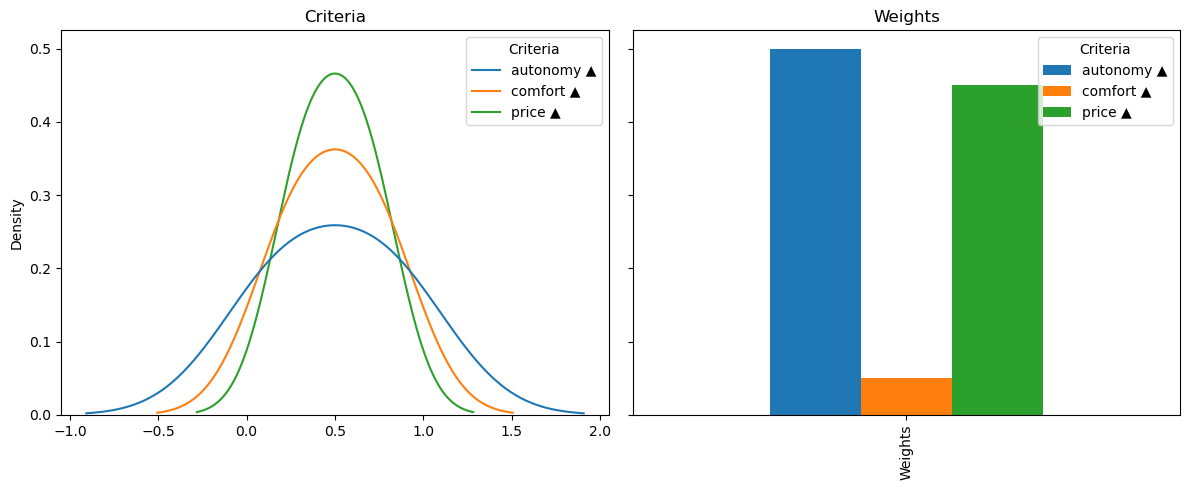

In [8]:
# we are going to user matplotlib capabilities of creat multiple figures
import matplotlib.pyplot as plt

# we create 2 axis with the same y axis
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# in the first axis we plot the criteria KDE
dmt.plot.kde(ax=axs[0])
axs[0].set_title("Criteria")


# in the second axis we plot the weights as bars
dmt.plot.wbar(ax=axs[1])
axs[1].set_title("Weights")

# adjust the layout of the figute based on the content
fig.tight_layout()

In [10]:
from skcriteria.madm import simple

dec = simple.WeightedSumModel()
rank = dec.evaluate(dmt)  # we use the tansformed version of the data
rank

array([0.41428571, 0.58571429])